In [1]:
# Include this line to make plots interactive
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Import CSVs
top1000 = pd.read_csv('data_sets/Highest Holywood Grossing Movies.csv')
top5000 = pd.read_csv('data_sets/tmdb_5000_movies.csv')

top1000.head()
#top5000.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,16-Dec-15,936662225,1132859475,2069521700,"Action, Adventure, Sci-Fi",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,24-Apr-19,858373000,1939128328,2797501328,"Action, Adventure, Drama, Sci-Fi",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,16-Dec-09,760507625,2086738578,2847246203,"Action, Adventure, Fantasy, Sci-Fi",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"Action, Adventure, Sci-Fi",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"Action, Adventure, Sci-Fi",2 hr 29 min,NaN


In [3]:
#Clean up data. Rows to keep: Top1000: 'Title', 'Distributor', 'Domestic Sales (in $)', 'International Sales (in $)', 'Genre'
#Top 5000:'title', 'vote_average', 'revenue', 'release_date', 'budget'

top1000 = top1000[['Title', 'Distributor', 'Domestic Sales (in $)', 'International Sales (in $)', 'Genre']]
top5000 = top5000[['title', 'vote_average', 'release_date', 'revenue', 'budget']]

top1000.head()
#top5000.head()

,Title,Distributor,Domestic Sales (in $),International Sales (in $),Genre
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225,1132859475,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000,1939128328,"Action, Adventure, Drama, Sci-Fi"
2,Avatar (2009),Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi"
3,Black Panther (2018),Walt Disney Studios Motion Pictures,700426566,647171407,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482,1369544272,"Action, Adventure, Sci-Fi"


In [4]:
#Clean up titles in Top1000 for easier merge

new_title = []

for x in top1000['Title']:
    
    old_title = x
    size = len(old_title)
    # Slice string to remove last 3 characters from
    Title = old_title[:size - 7]
    new_title.append(Title)
    #top1000.replace(to_replace= top1000['Title'], 
                     #value=Title 
                     #)
            
del top1000['Title']


            
top1000['title'] =  new_title


top1000.head()

,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title
0,Walt Disney Studios Motion Pictures,936662225,1132859475,"Action, Adventure, Sci-Fi",Star Wars: Episode VII - The Force Awakens
1,Walt Disney Studios Motion Pictures,858373000,1939128328,"Action, Adventure, Drama, Sci-Fi",Avengers: Endgame
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar
3,Walt Disney Studios Motion Pictures,700426566,647171407,"Action, Adventure, Sci-Fi",Black Panther
4,Walt Disney Studios Motion Pictures,678815482,1369544272,"Action, Adventure, Sci-Fi",Avengers: Infinity War


In [5]:
#merge the two datasets

final_movie_dataset = top1000.merge(top5000, how='left', on='title')

final_movie_dataset = final_movie_dataset.dropna(how='any',axis=0) 

final_movie_dataset.head()

#final_movie_dataset['release_date'].max()

,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title,vote_average,release_date,revenue,budget
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar,7.2,2009-12-10,2.787965e+09,237000000.0
6,Paramount Pictures,659363944,1542283320,"Drama, Romance",Titanic,7.5,1997-11-18,1.845034e+09,200000000.0
7,Universal Pictures,652385625,1018130819,"Action, Adventure, Sci-Fi",Jurassic World,6.5,2015-06-09,1.513529e+09,150000000.0
8,Walt Disney Studios Motion Pictures,623357910,895457605,"Action, Adventure, Sci-Fi",The Avengers,7.4,2012-04-25,1.519558e+09,220000000.0
11,Walt Disney Studios Motion Pictures,543638043,1119261396,"Adventure, Animation, Drama, Family, Musical",The Lion King,8.0,1994-06-23,7.882418e+08,45000000.0


In [6]:
#Update revenue

for row in final_movie_dataset:
    new_rev = (final_movie_dataset['Domestic Sales (in $)']+ final_movie_dataset['International Sales (in $)'])

    
    
del final_movie_dataset['revenue']


            
final_movie_dataset['Revenue'] =  new_rev

final_movie_dataset.head()    


,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title,vote_average,release_date,budget,Revenue
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar,7.2,2009-12-10,237000000.0,2847246203
6,Paramount Pictures,659363944,1542283320,"Drama, Romance",Titanic,7.5,1997-11-18,200000000.0,2201647264
7,Universal Pictures,652385625,1018130819,"Action, Adventure, Sci-Fi",Jurassic World,6.5,2015-06-09,150000000.0,1670516444
8,Walt Disney Studios Motion Pictures,623357910,895457605,"Action, Adventure, Sci-Fi",The Avengers,7.4,2012-04-25,220000000.0,1518815515
11,Walt Disney Studios Motion Pictures,543638043,1119261396,"Adventure, Animation, Drama, Family, Musical",The Lion King,8.0,1994-06-23,45000000.0,1662899439


In [7]:
#Create profit column

for row in final_movie_dataset:
    value = (final_movie_dataset['Revenue']- final_movie_dataset['budget'])
  


final_movie_dataset['Profit/Loss']= value

final_movie_dataset.head()

,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title,vote_average,release_date,budget,Revenue,Profit/Loss
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar,7.2,2009-12-10,237000000.0,2847246203,2.610246e+09
6,Paramount Pictures,659363944,1542283320,"Drama, Romance",Titanic,7.5,1997-11-18,200000000.0,2201647264,2.001647e+09
7,Universal Pictures,652385625,1018130819,"Action, Adventure, Sci-Fi",Jurassic World,6.5,2015-06-09,150000000.0,1670516444,1.520516e+09
8,Walt Disney Studios Motion Pictures,623357910,895457605,"Action, Adventure, Sci-Fi",The Avengers,7.4,2012-04-25,220000000.0,1518815515,1.298816e+09
11,Walt Disney Studios Motion Pictures,543638043,1119261396,"Adventure, Animation, Drama, Family, Musical",The Lion King,8.0,1994-06-23,45000000.0,1662899439,1.617899e+09


In [8]:
#Calculate domestic and international sales distributions


for row in final_movie_dataset:
    dom_rate = ((final_movie_dataset['Domestic Sales (in $)']/final_movie_dataset['Revenue'])*100).map("{:.2f}%".format)
    
final_movie_dataset['Domestic Sales (as % of total Revenue)'] = dom_rate

for row in final_movie_dataset:
    int_rate = ((final_movie_dataset['International Sales (in $)']/final_movie_dataset['Revenue'])*100).map("{:.2f}%".format)
    
final_movie_dataset['International Sales (as % of total Revenue)'] = int_rate

#Organize columns into more logical order

final_movie_dataset = final_movie_dataset[['title',
                                           'Distributor',
                                           'Genre',
                                           'release_date',
                                           'budget',
                                           'Domestic Sales (in $)',
                                           'International Sales (in $)',
                                           'Domestic Sales (as % of total Revenue)',
                                           'International Sales (as % of total Revenue)',
                                           'Revenue',
                                           'Profit/Loss',
                                           'vote_average'
                                          ]]


final_movie_dataset.head(20)
    


,title,Distributor,Genre,release_date,budget,Domestic Sales (in $),International Sales (in $),Domestic Sales (as % of total Revenue),International Sales (as % of total Revenue),Revenue,Profit/Loss,vote_average
2,Avatar,Twentieth Century Fox,"Action, Adventure, Fantasy, Sci-Fi",2009-12-10,237000000.0,760507625,2086738578,26.71%,73.29%,2847246203,2.610246e+09,7.2
6,Titanic,Paramount Pictures,"Drama, Romance",1997-11-18,200000000.0,659363944,1542283320,29.95%,70.05%,2201647264,2.001647e+09,7.5
7,Jurassic World,Universal Pictures,"Action, Adventure, Sci-Fi",2015-06-09,150000000.0,652385625,1018130819,39.05%,60.95%,1670516444,1.520516e+09,6.5
8,The Avengers,Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",2012-04-25,220000000.0,623357910,895457605,41.04%,58.96%,1518815515,1.298816e+09,7.4
11,The Lion King,Walt Disney Studios Motion Pictures,"Adventure, Animation, Drama, Family, Musical",1994-06-23,45000000.0,543638043,1119261396,32.69%,67.31%,1662899439,1.617899e+09,8.0
12,The Dark Knight,Warner Bros.,"Action, Crime, Drama, Thriller",2008-07-16,185000000.0,534858444,471115201,53.17%,46.83%,1005973645,8.209736e+08,8.2
18,Star Wars: Episode I - The Phantom Menace,Twentieth Century Fox,"Action, Adventure, Fantasy, Sci-Fi",1999-05-19,115000000.0,474544677,552538030,46.20%,53.80%,1027082707,9.120827e+08,6.3
20,Avengers: Age of Ultron,Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",2015-04-22,280000000.0,459005868,943803672,32.72%,67.28%,1402809540,1.122810e+09,7.3
21,The Dark Knight Rises,Warner Bros.,"Action, Crime, Drama",2012-07-16,250000000.0,448139099,633003513,41.45%,58.55%,1081142612,8.311426e+08,7.6
22,Shrek 2,DreamWorks Distribution,"Adventure, Animation, Comedy, Family, Fantasy,...",2004-05-19,150000000.0,441226247,487534523,47.51%,52.49%,928760770,7.787608e+08,6.7


In [9]:
list1 = final_movie_dataset['Genre'].tolist()

unique_list = []


for entry in list1:
    #Split the string into a list
    genres_from_entry = entry.split(", ")

    #For loop to add genre to unique_list if not alredy in unique_list
    for genre in genres_from_entry:
        if genre not in unique_list:
            unique_list.append(genre)



In [10]:
#output of unique_list
unique_list

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Animation',
 'Family',
 'Musical',
 'Crime',
 'Thriller',
 'Comedy',
 'Biography',
 'War',
 'Mystery',
 'Sport',
 'Horror',
 'Music',
 'History',
 'Western',
 'Documentary']

In [11]:
# Create empty dictionary to hold genre info
genre_dict = {}

In [12]:
###Add each unique genre to the dictionary with###

#Loop through unique_list
for entry in unique_list:

    ##Create dictionary entry to genre
    genre_dict.update(
        {
            #Make key for each genre based on genre name + '_dict_key'
            entry.lower() + '_dict_key': 
            {
                #Create Key-Value pairs
                "genre" : entry,
                "genre_total_title_count" : 0,
                "genre_total_budget" : 0,
                "genre_total_revenue" : 0,
                "genre_domestic_sales" : 0,
                "genre_international_sales" : 0,
                "sum_vote_average" : 0,
                "movie_title_list" : []
            
            
            
            
            
            }
        }



    ) 

In [13]:
# for loop to index through each row of the dataframe
for index, row in final_movie_dataset.iterrows():
    #row by row within for loop, creates a list of lowercase genres for each 
    genre_list_by_movie = row['Genre'].lower().split(", ")
    
    # For Loop to go through each element of the genre_list_by_movie
    for genre in genre_list_by_movie:

        #sets variable that will be used to access correct dictionary item by key
        genre_dict_key = genre + '_dict_key'
        
        #Set the dictionary values for the corresponding elements
        genre_dict[genre_dict_key]['genre_total_title_count'] = genre_dict[genre_dict_key]['genre_total_title_count'] + 1
        genre_dict[genre_dict_key]['genre_total_budget'] = genre_dict[genre_dict_key]['genre_total_budget'] + row['budget']
        genre_dict[genre_dict_key]['genre_total_revenue'] = genre_dict[genre_dict_key]['genre_total_revenue'] + row['Revenue']
        genre_dict[genre_dict_key]['genre_domestic_sales'] = genre_dict[genre_dict_key]['genre_domestic_sales'] + row['Domestic Sales (in $)']
        genre_dict[genre_dict_key]['genre_international_sales'] = genre_dict[genre_dict_key]['genre_international_sales'] + row['International Sales (in $)']
        genre_dict[genre_dict_key]['sum_vote_average'] = genre_dict[genre_dict_key]['sum_vote_average'] + row['vote_average']
        genre_dict[genre_dict_key]['movie_title_list'].append(row['title'])
        
        
    


In [14]:
#Make new dataframe from genre_dict
genre_df = pd.DataFrame.from_dict(genre_dict,orient='index')


#reset so index is numeric
genre_df.reset_index(drop=True,inplace=True)

In [15]:
#Output of genre_df
genre_df

,genre,genre_total_title_count,genre_total_budget,genre_total_revenue,genre_domestic_sales,genre_international_sales,sum_vote_average,movie_title_list
0,Action,300,3.377368e+10,131813301506,53560793805,78252507701,1938.7,"[Avatar, Jurassic World, The Avengers, The Dar..."
1,Adventure,316,3.700137e+10,159520075328,61956135804,97563939524,2050.9,"[Avatar, Jurassic World, The Avengers, The Lio..."
2,Fantasy,154,1.744549e+10,73400721969,28947837246,44452884723,982.7,"[Avatar, Star Wars: Episode I - The Phantom Me..."
3,Sci-Fi,160,1.966200e+10,78830235034,31693650614,47136584420,1037.7,"[Avatar, Jurassic World, The Avengers, Star Wa..."
4,Drama,230,1.542450e+10,76009228534,34665514684,41343713850,1581.4,"[Titanic, The Lion King, The Dark Knight, The ..."
5,Romance,120,7.227488e+09,39192702764,17816203438,21376499326,763.5,"[Titanic, Shrek 2, Aladdin, Forrest Gump, Shre..."
6,Animation,102,1.092699e+10,48612985382,18784611980,29828373402,670.1,"[The Lion King, Shrek 2, The Lion King, Toy St..."
7,Family,169,1.625749e+10,71815155881,29288660969,42526494912,1076.4,"[The Lion King, Shrek 2, E.T. the Extra-Terres..."
8,Musical,33,2.364488e+09,14841841976,5893551024,8948290952,216.2,"[The Lion King, The Lion King, Frozen, Aladdin..."
9,Crime,105,6.780300e+09,29080452307,14328299490,14752152817,692.6,"[The Dark Knight, The Dark Knight Rises, Despi..."


In [36]:
distributors = []

distributors = final_movie_dataset["Distributor"].unique()

distributors_count = final_movie_dataset["Distributor"].value_counts()


distributor_sum = final_movie_dataset.groupby("Distributor")["Revenue"].sum()
distributor_sum.sort_values(ascending=False)

distributor_bud = final_movie_dataset.groupby("Distributor")["budget"].sum()
distributor_bud.sort_values(ascending=False)

average_sum = distributor_sum / distributors_count

average_bud = distributor_bud / distributors_count

distributors_df = pd.DataFrame({
    "Distributors": distributors,
    "Number of Movies": distributors_count,
    "Revenue": distributor_sum,
    "Budget": distributor_bud,
    "Average Revenue": average_sum,
    "Average Budget": average_bud
})

distributors_df.sort_values(by=["Revenue"], ascending=False).iloc[0:10].reset_index(drop=True)

,Distributors,Number of Movies,Revenue,Budget,Average Revenue,Average Budget
0,United Artists,105,49022735890,1.144299e+10,4.668832e+08,1.089808e+08
1,Focus Features,118,44575180555,1.108518e+10,3.777558e+08,9.394218e+07
2,STX Entertainment,90,37951909795,8.116500e+09,4.216879e+08,9.018333e+07
3,Relativity Media,88,32118219521,6.113300e+09,3.649798e+08,6.946932e+07
4,Orion Pictures,84,27900719497,6.754015e+09,3.321514e+08,8.040494e+07
5,Artisan Entertainment,81,26804703780,7.127700e+09,3.309223e+08,8.799630e+07
6,Walt Disney Studios Motion Pictures,19,9871651542,2.490000e+09,5.195606e+08,1.310526e+08
7,Columbia Pictures,17,6306075178,1.027000e+09,3.709456e+08,6.041176e+07
8,New Line Cinema,12,5584123187,9.600000e+08,4.653436e+08,8.000000e+07
9,Warner Bros.,16,5565291020,1.126000e+09,3.478307e+08,7.037500e+07


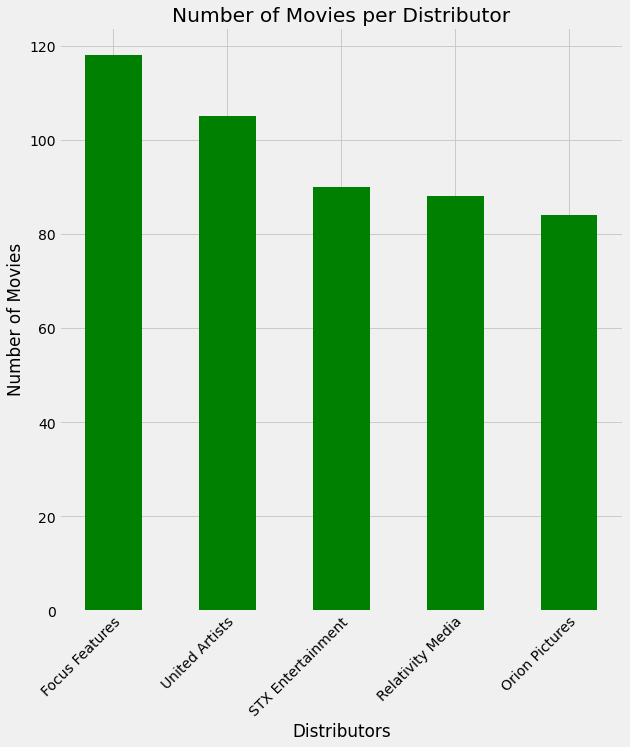

In [70]:
plt.figure(figsize=(9, 10))

count_dis = distributors_df.sort_values(by=["Number of Movies"], ascending=False).iloc[0:5].reset_index(drop=True)

x_values = count_dis["Distributors"]
y_values = count_dis["Number of Movies"]

plt.bar(x_values, y_values, width=0.5, color="green")
plt.xticks(rotation="45", ha = "right", rotation_mode='anchor')

plt.xlabel("Distributors")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Distributor")

plt.savefig("distributors_1.png", pad_inches=0.5, bbox_inches='tight')

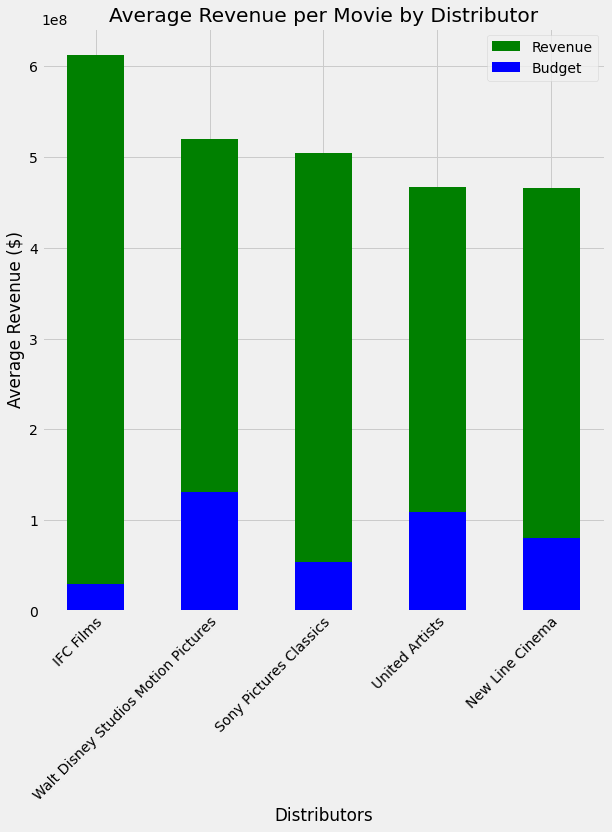

In [61]:
plt.figure(figsize=(9, 10))

avg_dis = distributors_df.sort_values(by=["Average Revenue"], ascending=False).iloc[0:8].reset_index(drop=True)

dict1 = plt.bar(avg_dis["Distributors"], avg_dis["Average Revenue"], width=0.5, label= "Revenue", color="green")
dict2 = plt.bar(avg_dis["Distributors"], avg_dis["Average Budget"], width=0.5, label= "Budget", color="blue")
plt.xticks(rotation="45", ha = "right", rotation_mode='anchor')
plt.legend()

plt.xlabel("Distributors")
plt.ylabel("Average Revenue ($)")
plt.title("Average Revenue per Movie by Distributor")

plt.savefig("distributors_2.png")

In [39]:
distributors_df.describe()

,Number of Movies,Revenue,Budget,Average Revenue,Average Budget
count,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,21.812500,8.235730e+09,1.852820e+09,3.057825e+08,5.324195e+07
std,36.177374,1.438197e+10,3.379329e+09,1.179847e+08,3.229893e+07
min,1.000000,1.780628e+08,6.000000e+04,1.460925e+08,6.000000e+04
25%,1.000000,2.812986e+08,4.575000e+07,2.065828e+08,2.775000e+07
50%,4.500000,1.182057e+09,2.140000e+08,2.789276e+08,5.350000e+07
75%,16.250000,5.764611e+09,1.051750e+09,3.692944e+08,7.550000e+07
max,118.000000,4.902274e+10,1.144299e+10,6.120545e+08,1.310526e+08
